<a href="https://colab.research.google.com/github/ArthurKruos/Project-Seazone/blob/main/Project_Seazone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise de dados na Seazone | Seazone Data Analysis Project

**Importando dados do projeto**

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df_ratings = pd.read_csv('/content/desafio_ratings.csv', encoding = 'ISO-8859-1' , sep = ';')
df_details = pd.read_csv('/content/desafio_details.csv', encoding = 'ISO-8859-1' , sep = ';' )
df_details.to_excel('desafio_details.xlsx')
df_ratings.to_excel('desafio_ratings.xlsx')

print("--------------------------- df_ratings --------------------------")
print(df_ratings.info())
print(df_ratings.describe())
print("--------------------------- df_details --------------------------")
print(df_details.info())
print(df_details.describe())


--------------------------- df_ratings --------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         713 non-null    int64  
 1   hotel_id           713 non-null    int64  
 2   hotel_name         713 non-null    object 
 3   url                713 non-null    object 
 4   Comodidades        299 non-null    float64
 5   Limpeza            300 non-null    float64
 6   Conforto           300 non-null    float64
 7   Custo-benefício    300 non-null    float64
 8   Localização        300 non-null    float64
 9   Total              300 non-null    float64
 10  WiFi gratuito      32 non-null     float64
 11  number_of_ratings  713 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 67.0+ KB
None
       Unnamed: 0      hotel_id  Comodidades     Limpeza    Conforto  \
count  713.000000

# 1. Ordene as cidades em ordem crescente de número de listings

In [ ]:
Count_Ordem_Cidade = df_details['city_name'].value_counts().reset_index()
Count_Ordem_Cidade.columns = ['Cidade', 'Quantidade']
Count_Ordem_Cidade.sort_values(by = ['Quantidade'] , ascending = True)

,Cidade,Quantidade
38,São José,1
30,Camboriú,1
31,Bertioga,1
32,Meia Praia,1
37,Pirenópolis,1
34,Águas Brancas,1
35,Taguatinga,1
36,Caldas Novas,1
33,Praia do Rosa,1
29,Trancoso,2


In [ ]:
qtd_cidade = Counter(df_details['city_name'])
qtd_cidade_plt = Counter(df_details['city_name'].head())
list_cidade = list(qtd_cidade_plt.values())

# 2. Ordene as cidades em ordem decrescente de metros quadrados (Verificar NaN e rever tabela)

In [ ]:

Ordem_cidades_metrosQ = df_details.groupby('city_name')['room_surface_in_m2'].sum().reset_index()
Ordem_cidades_metrosQ.columns = ['city_name', 'room_surface_in_m2']
Ordem_cidades_metrosQ.sort_values(by = 'room_surface_in_m2', ascending = False).reset_index()


,index,city_name,room_surface_in_m2
0,13,Florianópolis,49473.22
1,15,Goiânia,5342.00
2,5,Bombinhas,4247.00
3,3,Balneário Camboriú,4023.80
4,21,Itapema,2553.80
5,11,Campos do Jordão,2495.00
6,28,Porto Seguro,2019.26
7,8,Cabo Frio,1687.00
8,35,Ubatuba,1476.00
9,20,Itajaí,1368.37


# 3. Quais cidades têm mais avaliações? (Validar dados)

In [ ]:
Merge_Tabelas = pd.merge(df_ratings, df_details, on = 'hotel_id')
Merge_Tabelas_nr = Merge_Tabelas[[ 'city_name','number_of_ratings' ]].sort_values(by='number_of_ratings', ascending = False)
Cidades_mais_avaliadas = Merge_Tabelas_nr.groupby('city_name').agg({ 'number_of_ratings': ['count', 'sum'] }).reset_index()
Cidades_mais_avaliadas.columns = ['city_name', 'count_of_ratings', 'sum_of_ratings']
Cidades_mais_avaliadas.sort_values(by= 'count_of_ratings', ascending = False)

,city_name,count_of_ratings,sum_of_ratings
13,Florianópolis,762,87353
15,Goiânia,138,531
5,Bombinhas,65,1126
3,Balneário Camboriú,35,54
35,Ubatuba,35,15
1,Anitápolis,27,2106
11,Campos do Jordão,24,1815
19,Imbituba,23,0
21,Itapema,22,19
26,Porto Alegre,19,5


# 4. Quais cidades têm a maior média de avaliações? E a menor média? (validar)

In [ ]:
Cidades_maiores_medias_1 = Merge_Tabelas.groupby('city_name').agg({ 'Total' : 'mean' }).reset_index()
Cidades_maiores_medias_1 = Cidades_maiores_medias_1.sort_values(by = "Total" , ascending = False)
display(Cidades_maiores_medias_1.head())
display(Cidades_maiores_medias_1.dropna().tail())

,city_name,Total
0,Angra dos Reis,10.000000
6,Brasília,10.000000
18,Ilhéus,10.000000
27,Porto Belo,9.766667
24,Petrópolis,9.500000


,city_name,Total
15,Goiânia,7.978947
26,Porto Alegre,7.600000
16,Gramado,7.416667
36,Urubici,4.000000
10,Camboriú,1.000000


# **5. Existem correlações entre as características de um anúncio e a sua localização?** (fazer count depois processar informações)


In [ ]:
unique_facilities = set()

# Loop externo para percorrer linha por linha
for index, row in Merge_Tabelas.iterrows():
    # Convertendo a string para lista
    facilities = eval(row['room_facilities'])

    # Loop interno para percorrer o array em cada linha
    for facility in facilities:
        unique_facilities.add(facility)  # Adicionando a característica única ao conjunto(pilha)

# Exibir as características únicas empilhadas
print("Características únicas empilhadas:")
display(unique_facilities)

Características únicas empilhadas:


{'A unidade é totalmente acessível para cadeira de rodas',
 'Acessível para pessoas com deficiência auditiva',
 'Acessível por elevador',
 'Andares superiores acessíveis por elevador',
 'Andares superiores acessíveis somente por escada',
 'Aquecimento',
 'Ar-condicionado',
 'Arara para roupas',
 'Armários individuais',
 'Banheira',
 'Banheira de hidromassagem',
 'Banheira ou chuveiro',
 'Banheiro adicional',
 'Banheiro compartilhado',
 'Banheiro privativo',
 'Berço',
 'Cadeirinha para refeições (crianças)',
 'Cama dobrável',
 'Canais a cabo',
 'Canais via satélite',
 'Cartão de acesso',
 'Cesto de lixo',
 'Chaleira elétrica',
 'Chaleira/cafeteira',
 'Chave de acesso',
 'Chinelos',
 'Churrasqueira',
 'Chuveiro',
 'Closet',
 'Cofre',
 'Cofre para notebook',
 'Comodidades para passar roupa',
 'Computador',
 'Condicionador',
 'Cozinha',
 'Cozinha compacta',
 'Detector de fumaça',
 'Detector de monóxido de carbono',
 'Entrada privativa',
 'Extintor de incêndio',
 'Ferro de passar roupa',
 '

In [92]:
for facility in unique_facilities:
    Merge_Tabelas[facility] = 0

# Preencher as colunas com 1 se a característica estiver presente
for index, row in Merge_Tabelas.iterrows():
    facilities = eval(row['room_facilities'])
    for facility in facilities:
        Merge_Tabelas.at[index, facility] = 1

# Exibir o DataFrame modificado
display(Merge_Tabelas)

,Unnamed: 0_x,hotel_id,hotel_name_x,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,...,Secador de cabelo,Geminado,Toda a unidade localizada no térreo,Extintor de incêndio,Vista da montanha,Banheira ou chuveiro,Geladeira,Independente,Cadeirinha para refeições (crianças),Garrafa de água
0,2,10966118,Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,1,0,0
1,5,10959776,Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,0,1
2,6,10949139,Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
3,9,10948439,Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,1,0,0
4,10,10943450,Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,734,359731,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,...,1,0,0,0,0,0,1,0,0,0
1287,734,359731,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,...,1,0,0,0,0,0,1,0,0,0
1288,734,359731,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,...,1,0,0,0,0,0,1,0,0,0
1289,734,359731,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
# Crie um conjunto vazio para armazenar as características únicas
unique_cities = set()
# Loop para percorrer cada linha do DataFrame
for index, row in Merge_Tabelas.iterrows():
    # Adicione o valor da coluna 'city_name' após remover espaços em branco e converter para minúsculas
    city = row['city_name'].strip().lower()
    unique_cities.add(city)

# Exiba as características únicas empilhadas
print("Cidades únicas empilhadas:")
display(unique_cities)

# Crie colunas binárias no DataFrame para cada cidade única
for city in unique_cities:
    Merge_Tabelas[city] = 0

# Preencha as colunas com 1 se a cidade estiver presente
for index, row in Merge_Tabelas.iterrows():
    city = row['city_name'].strip().lower()
    Merge_Tabelas.at[index, city] = 1

# Exiba o DataFrame modificado
display(Merge_Tabelas)

Cidades únicas empilhadas:


{'angra dos reis',
 'anitápolis',
 "arraial d'ajuda",
 'balneário camboriú',
 'bertioga',
 'bombinhas',
 'brasília',
 'búzios',
 'cabo frio',
 'caldas novas',
 'camboriú',
 'campos do jordão',
 'canela',
 'florianópolis',
 'garopaba',
 'goiânia',
 'gramado',
 'hidrolândia',
 'ilhéus',
 'imbituba',
 'itajaí',
 'itapema',
 'maceió',
 'meia praia',
 'petrópolis',
 'pirenópolis',
 'porto alegre',
 'porto belo',
 'porto seguro',
 'poços de caldas',
 'praia do rosa',
 'santa cruz cabrália',
 'são josé',
 'taguatinga',
 'trancoso',
 'ubatuba',
 'urubici',
 'águas brancas',
 'águas claras'}

,Unnamed: 0_x,hotel_id,hotel_name_x,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,...,búzios,hidrolândia,águas claras,cabo frio,santa cruz cabrália,taguatinga,anitápolis,arraial d'ajuda,ilhéus,ubatuba
0,2,10966118,Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,5,10959776,Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,6,10949139,Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,9,10948439,Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,10,10943450,Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,734,359731,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,...,0,0,0,0,0,0,0,0,0,0
1287,734,359731,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,...,0,0,0,0,0,0,0,0,0,0
1288,734,359731,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,...,0,0,0,0,0,0,0,0,0,0
1289,734,359731,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Limpando os dados das notas
colunas_verificar_nan = ['Comodidades', 'Limpeza', 'Conforto', 'Custo-benefício', 'Localização', 'Total', 'WiFi gratuito', 'number_of_ratings']

# Eliminar linhas que contenham NaN nas colunas especificadas
df_merge = Merge_Tabelas.dropna(subset=colunas_verificar_nan)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertendo o conjunto para uma lista
colunas_cidades = list(unique_cities)
colunas_caracteristicas = list(unique_facilities)

colunas_existem = all(coluna in Merge_Tabelas.columns for coluna in colunas_caracteristicas + colunas_cidades)

if colunas_existem:
    df_relacao = Merge_Tabelas[colunas_cidades + colunas_caracteristicas]

    # matriz de correlação entre as características e a presença em cada cidade
    correlacao = df_relacao.corr()

    # Filtrar apenas as correlações entre cidades e características
    correlacoes_cidade_caracteristica = correlacao.loc[colunas_cidades, colunas_caracteristicas]

    # Filtra apenas os valores acima de 0.1
    correlacoes_filtradas_tabela = correlacoes_cidade_caracteristica[correlacoes_cidade_caracteristica > 0.1]

    # Remove os valores NaN
    correlacoes_filtradas_tabela = correlacoes_filtradas_tabela.dropna(axis=1, how='all')

    # Estilizando a tabela para melhor visualização
    tabela_positivos = correlacoes_filtradas_tabela.style.background_gradient(cmap='coolwarm', axis=None).highlight_null('white')

    # Exibe a tabela estilizada
    display(tabela_positivos)

    # Filtra apenas os valores menores que -0.1
    correlacoes_filtradas_tabela = correlacoes_cidade_caracteristica[correlacoes_cidade_caracteristica < -0.1]

    # Remove os valores NaN
    correlacoes_filtradas_tabela = correlacoes_filtradas_tabela.dropna(axis=1, how='all')

    # Estilizando a tabela para melhor visualização
    tabela_negativos = correlacoes_filtradas_tabela.style.background_gradient(cmap='coolwarm', axis=None).highlight_null('white')

    # Exibe a tabela estilizada
    display(tabela_negativos)
else:
    print("Colunas não encontradas no DataFrame Merge_Tabelas.")

,Travesseiro comum,Jacuzzi,Fontes de monóxido de carbono,Acessível por elevador,Banheiro privativo,Toalete compartilhado,Shampoo,Vista do jardim,Aquecimento,Varal para secar roupas,Touca de banho,Pia do banheiro rebaixada,Piscina climatizada,Chaleira elétrica,Chave de acesso,Piscina privativa,Utensílios de cozinha,Serviço de streaming (como Netflix),Sofá,Roteador wireless,Produtos de higiene pessoal gratuitos,Área para refeições,Roupa de cama e banho (custo adicional),Travesseiro de pena,Mesa de trabalho,Vista da cidade,Vista do pátio interno,Entrada privativa,TV de tela plana,Terraço,Telefone,Álcool gel,Sofá-cama,TV,Vista do rio,Internet sem fio (Wi-Fi),Vista do lago,Ar-condicionado,Andares superiores acessíveis por elevador,Detector de fumaça,Acessível para pessoas com deficiência auditiva,Toalete adicional,Berço,Armários individuais,Comodidades para passar roupa,Piscina com vista,Andares superiores acessíveis somente por escada,Lareira,Área de refeições externa,Banheira,Banheira de hidromassagem,Vista,Chuveiro,Tomada perto da cama,Papel higiênico,Churrasqueira,Área de chuveiro ampla,Detector de monóxido de carbono,Frigobar,Cartão de acesso,Jogos de tabuleiro/quebra-cabeças,Chaleira/cafeteira,Toalhas de piscina,Forno,Cofre,Taças de vinho,Condicionador,Secadora de roupas,Área de estar,Produtos de limpeza,Cozinha,Arara para roupas,Móveis na área externa,Closet,Ferro de passar roupa,Varanda térrea,Vista do mar,Torradeira,Cozinha compacta,Canais a cabo,Isolamento acústico,Internet,Sabonete,Mesa de jantar,Ventilador,Vaso sanitário,Máquina de lavar roupas,Piso de madeira ou parquet,Varanda,Máquina de café,Secador de cabelo,Toda a unidade localizada no térreo,Extintor de incêndio,Vista da montanha,Banheira ou chuveiro,Geladeira,Independente,Cadeirinha para refeições (crianças),Garrafa de água
gramado,nan,nan,nan,nan,nan,nan,nan,nan,0.223027,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.110368,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
praia do rosa,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
são josé,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.102320,nan,nan,nan,nan,nan,0.119003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
trancoso,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
águas brancas,nan,0.117170,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.113728,nan,nan,0.177505,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.109796,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
porto alegre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

,Travesseiro comum,Jacuzzi,Fontes de monóxido de carbono,Acessível por elevador,Banheiro privativo,Shampoo,Varal para secar roupas,Fogão,Chaleira elétrica,Chave de acesso,Utensílios de cozinha,Sofá,Produtos de higiene pessoal gratuitos,Área para refeições,Roupa de cama,TV de tela plana,Terraço,Cesto de lixo,Sofá-cama,TV,Internet sem fio (Wi-Fi),Ar-condicionado,Andares superiores acessíveis por elevador,Micro-ondas,Comodidades para passar roupa,Andares superiores acessíveis somente por escada,Lareira,Banheira de hidromassagem,Vista,Chuveiro,Tomada perto da cama,Papel higiênico,Toalhas,Churrasqueira,Área de chuveiro ampla,Frigobar,Chaleira/cafeteira,Forno,Taças de vinho,Área de estar,Produtos de limpeza,Cozinha,Guarda-roupa ou armário,Arara para roupas,Móveis na área externa,Ferro de passar roupa,Varanda térrea,Vista do mar,Torradeira,Cozinha compacta,Isolamento acústico,Internet,Sabonete,Mesa de jantar,Ventilador,Vaso sanitário,Máquina de lavar roupas,Piso de madeira ou parquet,Varanda,Máquina de café,Secador de cabelo,Toda a unidade localizada no térreo,Vista da montanha,Geladeira,Independente,Garrafa de água
gramado,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
praia do rosa,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
são josé,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
trancoso,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
águas brancas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
porto alegre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
caldas novas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
maceió,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pirenópolis,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
goiânia,-0.292469,nan,nan,-0.171388,nan,nan,-0.149308,nan,-0.155077,-0.215537,nan,nan,nan,-0.229687,nan,-0.289685,-0.160739,nan,-0.177694,nan,-0.157228,nan,-0.124014,nan,-0.174569,-0.114275,nan,nan,-0.164051,-0.290518,-0.228547,nan,nan,-0.201407,nan,-0.104002,-0.138615,-0.138730,-0.272266,nan,nan,nan,nan,nan,-0.116754,nan,nan,-0.129658,nan,-0.180404,nan,nan,-0.119688,-0.290760,-0.116754,-0.30826

# **6. Existem relações entre a nota do anúncio e os recursos disponíveis no imóvel?**

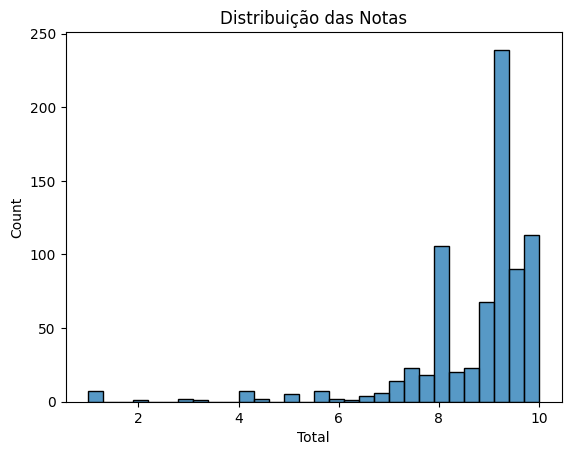

In [ ]:
sns.histplot(Merge_Tabelas['Total'])
plt.title('Distribuição das Notas')
plt.show()

In [ ]:
df_1 = pd.read_csv('/content/desafio_ratings.csv', encoding = 'ISO-8859-1' , sep = ';')
df_2 = pd.read_csv('/content/desafio_details.csv', encoding = 'ISO-8859-1' , sep = ';' )

df_merge = pd.merge(df_2, df_1, on='hotel_id')

# Exibir o DataFrame resultante
display(df_merge)

,Unnamed: 0_x,hotel_id,room_id,hotel_name_x,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,Unnamed: 0_y,hotel_name_y,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings
0,2,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.00,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'...",2,Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,5,10959776,1095977602,Apartamentos no Jardim Goiás Goiânia/GO - THO,Goiânia,apartment,Apartamento,48.00,"['Banheiro privativo', 'Secador de cabelo', 'S...",5,Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,6,10949139,1094913902,Casa triplex em condomínio Floripa-SC ALI024,Florianópolis,holiday_home,Casa de Temporada,170.00,"['Área de estar', 'Toalete adicional', 'Utensí...",6,Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,10948439,1094843901,Apto com piscina no centro de Floripa PCE0406,Florianópolis,apartment,Apartamento de 1 Quarto,32.00,"['Acessível por elevador', 'Chuveiro', 'Mesa d...",9,Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10,10943450,1094345002,Apto espaçoso na beira do lago em Ilhéus ARS0169,Ilhéus,holiday_home,Casa de 3 Quartos,134.74,"['Fogão', 'Guarda-roupa ou armário', 'Toalhas'...",10,Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1312,359731,35973107,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Secador de cabelo', 'Vaso sanitário', 'Andar...",734,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88
1287,1313,359731,35973108,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,53.00,"['Banheiro privativo', 'Máquina de café', 'Mes...",734,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88
1288,1314,359731,35973109,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Chave de acesso', 'Travesseiro comum', 'TV d...",734,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88
1289,1315,359731,35973110,Lindo condomínio em meio à natureza em Bombinh...,Bombinhas,guest_house,Apartamento com Varanda,50.00,"['Ar-condicionado', 'TV de tela plana', 'Micro...",734,Lindo condomínio em meio à natureza em Bombinh...,https://www.booking.com/hotel/br/pousada-villa...,8.5,8.7,8.8,8.5,8.5,8.7,8.1,88


In [ ]:
unique_facilities = set()

# Loop externo para percorrer linha por linha
for index, row in df_merge.iterrows():
    # Convertendo a string para lista
    facilities = eval(row['room_facilities'])

    # Loop interno para percorrer o array em cada linha
    for facility in facilities:
        unique_facilities.add(facility)  # Adicionando a característica única ao conjunto(pilha)

# Exibir as características únicas empilhadas
print("Características únicas empilhadas:")
display(unique_facilities)

Características únicas empilhadas:


{'A unidade é totalmente acessível para cadeira de rodas',
 'Acessível para pessoas com deficiência auditiva',
 'Acessível por elevador',
 'Andares superiores acessíveis por elevador',
 'Andares superiores acessíveis somente por escada',
 'Aquecimento',
 'Ar-condicionado',
 'Arara para roupas',
 'Armários individuais',
 'Banheira',
 'Banheira de hidromassagem',
 'Banheira ou chuveiro',
 'Banheiro adicional',
 'Banheiro compartilhado',
 'Banheiro privativo',
 'Berço',
 'Cadeirinha para refeições (crianças)',
 'Cama dobrável',
 'Canais a cabo',
 'Canais via satélite',
 'Cartão de acesso',
 'Cesto de lixo',
 'Chaleira elétrica',
 'Chaleira/cafeteira',
 'Chave de acesso',
 'Chinelos',
 'Churrasqueira',
 'Chuveiro',
 'Closet',
 'Cofre',
 'Cofre para notebook',
 'Comodidades para passar roupa',
 'Computador',
 'Condicionador',
 'Cozinha',
 'Cozinha compacta',
 'Detector de fumaça',
 'Detector de monóxido de carbono',
 'Entrada privativa',
 'Extintor de incêndio',
 'Ferro de passar roupa',
 '

In [93]:
for facility in unique_facilities:
    df_merge[facility] = 0

# Preencher as colunas com 1 se a característica estiver presente
for index, row in Merge_Tabelas.iterrows():
    facilities = eval(row['room_facilities'])
    for facility in facilities:
        df_merge.at[index, facility] = 1

# Exibir o DataFrame modificado
display(df_merge)

,Unnamed: 0_x,hotel_id,room_id,hotel_name_x,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,Unnamed: 0_y,...,Secador de cabelo,Geminado,Toda a unidade localizada no térreo,Extintor de incêndio,Vista da montanha,Banheira ou chuveiro,Geladeira,Independente,Cadeirinha para refeições (crianças),Garrafa de água
129,145.0,10792136.0,1.079214e+09,Metropolitan Sidney - MSS,Goiânia,apartment,Apartamento,70.0,"['Shampoo', 'Geladeira', 'Produtos de limpeza'...",92.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
130,146.0,10792136.0,1.079214e+09,Metropolitan Sidney - MSS,Goiânia,apartment,Apartamento,39.0,"['Papel higiênico', 'Secador de cabelo', 'Cest...",92.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
131,147.0,10792136.0,1.079214e+09,Metropolitan Sidney - MSS,Goiânia,apartment,Apartamento,NaN,"['Produtos de limpeza', 'Micro-ondas', 'Secado...",92.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
132,148.0,10792136.0,1.079214e+09,Metropolitan Sidney - MSS,Goiânia,apartment,Apartamento,39.0,"['Roupa de cama', 'Banheiro privativo', 'TV', ...",92.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
438,464.0,10096430.0,1.009643e+09,Moderno studio c/ piscina no Partenon CON1506,Porto Alegre,apartment,Apartamento Estúdio,26.0,"['Geladeira', 'Banheiro privativo', 'Torradeir...",282.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:
# Limpando os dados das notas
colunas_verificar_nan = ['Comodidades', 'Limpeza', 'Conforto', 'Custo-benefício', 'Localização', 'Total', 'WiFi gratuito', 'number_of_ratings']

# Eliminar linhas que contenham NaN nas colunas especificadas
df_merge = df_merge.dropna(subset=colunas_verificar_nan)

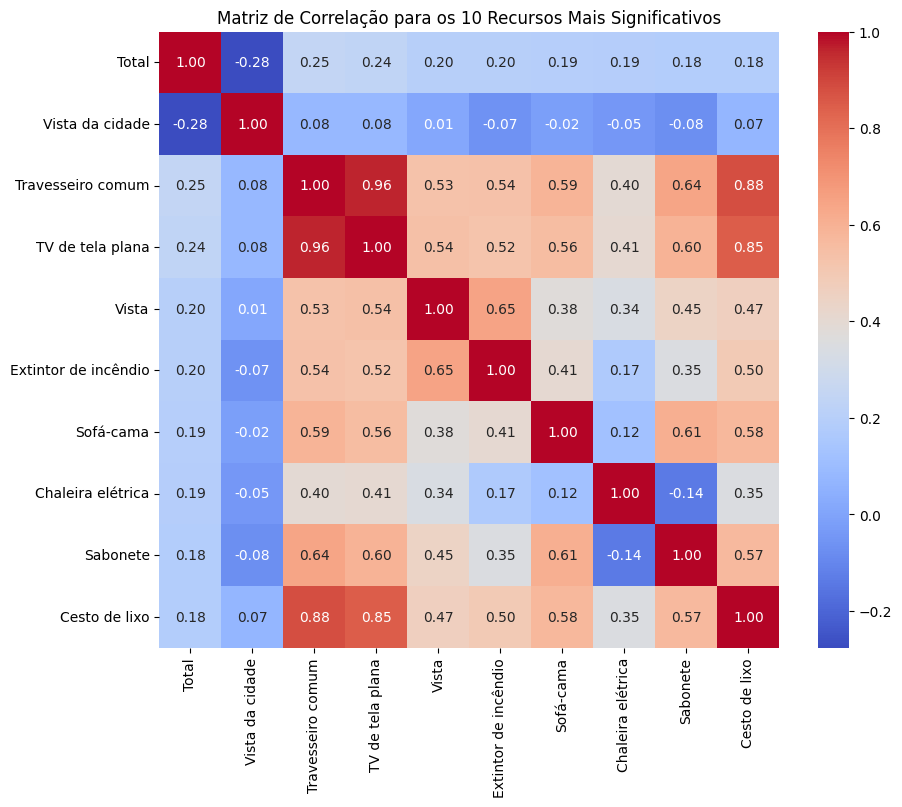

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


colunas_recursos = list(unique_facilities)
colunas_nota_hotel = ['Total']


colunas_existem = all(coluna in df_merge.columns for coluna in colunas_nota_hotel + colunas_recursos)

if colunas_existem:
    df_relacao = df_merge[colunas_nota_hotel + colunas_recursos]

    correlacao = df_relacao.corr()

    num_recursos_a_exibir = 10

    ordem_recursos = correlacao['Total'].abs().sort_values(ascending=False).index

    recursos_selecionados = ordem_recursos[:num_recursos_a_exibir]

    df_relacao_selecionado = df_relacao[recursos_selecionados]


    plt.figure(figsize=(10, 8))
    sns.heatmap(df_relacao_selecionado.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Matriz de Correlação para os {num_recursos_a_exibir} Recursos Mais Significativos")
    plt.show()
else:
    print("Colunas não encontradas no DataFrame df_merge.")

# **7. Existe alguma relação entre a nota recebida e a localização?**

In [ ]:
Merge_Tabelas[[ 'Total' ]].describe()

,Total
count,759.000000
mean,8.710013
std,1.356361
min,1.000000
25%,8.000000
50%,9.100000
75%,9.400000
max,10.000000


In [ ]:
# Analisando a média de avaliações gerais por cidade, e pesando pela quantidade de avaliações que cada cidade teve.
Merge_Tabelas = pd.merge(df_ratings, df_details, on = 'hotel_id')
Merge_Tabelas_nr = Merge_Tabelas[[ 'city_name','number_of_ratings','Total' ]].sort_values(by='number_of_ratings', ascending = False)
Cidades_mais_avaliadas = Merge_Tabelas_nr.groupby('city_name').agg({ 'Total' : ['count', 'sum','mean'] }).reset_index()
Cidades_mais_avaliadas.columns = ['city_name', 'count_of_ratings', 'sum_of_ratings', 'Mean_of_Num_Ratings']
Cidades_mais_avaliadas.sort_values(by= ['Mean_of_Num_Ratings', 'count_of_ratings'], ascending = [False, False]).dropna().reset_index()

,index,city_name,count_of_ratings,sum_of_ratings,Mean_of_Num_Ratings
0,6,Brasília,6,60.0,10.000000
1,18,Ilhéus,2,20.0,10.000000
2,0,Angra dos Reis,1,10.0,10.000000
3,27,Porto Belo,3,29.3,9.766667
4,8,Cabo Frio,3,28.5,9.500000
5,14,Garopaba,2,19.0,9.500000
6,24,Petrópolis,2,19.0,9.500000
7,32,São José,1,9.5,9.500000
8,35,Ubatuba,15,142.0,9.466667
9,1,Anitápolis,27,253.8,9.400000


In [ ]:
# Analisando a média de avaliações de localidade por cidade, e pesando pela quantidade de avaliações que cada cidade teve.
Merge_Tabelas = pd.merge(df_ratings, df_details, on = 'hotel_id')
Merge_Tabelas_nr = Merge_Tabelas[[ 'city_name','number_of_ratings','Localização' ]].sort_values(by='number_of_ratings', ascending = False)
Cidades_mais_avaliadas = Merge_Tabelas_nr.groupby('city_name').agg({ 'Localização' : ['count', 'sum','mean'] }).reset_index()
Cidades_mais_avaliadas.columns = ['city_name', 'count_of_ratings', 'sum_of_ratings', 'Mean_of_Num_Ratings']
Cidades_mais_avaliadas.sort_values(by= ['count_of_ratings','Mean_of_Num_Ratings'], ascending = [False,False]).dropna().reset_index()

cidades_interessantes = ['Florianópolis', 'Goiânia', 'Bombinhas', 'Anitápolis', 'Campos do Jordão']

# Use o método isin() para verificar se os valores na coluna 'city_name' estão nas cidades de interesse
filtro_cidades = Merge_Tabelas['city_name'].isin(cidades_interessantes)

# Aplique o filtro
resultados_filtrados = Merge_Tabelas[filtro_cidades]

# Exiba os resultados
resultados_filtrados.sort_values(by = 'Localização', ascending = False).reset_index().head(10)

,index,Unnamed: 0_x,hotel_id,hotel_name_x,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,...,WiFi gratuito,number_of_ratings,Unnamed: 0_y,room_id,hotel_name_y,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities
0,129,92,10792136,Metropolitan Sidney - MSS,https://www.booking.com/hotel/br/metropolitan-...,10.0,10.0,10.0,7.5,10.0,...,10.0,1,145,1079213602,Metropolitan Sidney - MSS,Goiânia,apartment,Apartamento,70.0,"['Shampoo', 'Geladeira', 'Produtos de limpeza'..."
1,273,135,10731993,ARE - apartamentos próximos ao centro,https://www.booking.com/hotel/br/are-apartamen...,10.0,10.0,10.0,10.0,10.0,...,NaN,1,291,1073199302,ARE - apartamentos próximos ao centro,Florianópolis,apartment,Estúdio,28.3,"['Roupa de cama', 'TV', 'Travesseiro comum', '..."
2,582,405,9955530,VDA - Canasvieiras,https://www.booking.com/hotel/br/vda-canasviei...,10.0,7.5,10.0,7.5,10.0,...,NaN,1,608,995553002,VDA - Canasvieiras,Florianópolis,apartment,Apartamento,100.0,"['Fogão', 'Travesseiro comum', 'Chaleira/cafet..."
3,583,405,9955530,VDA - Canasvieiras,https://www.booking.com/hotel/br/vda-canasviei...,10.0,7.5,10.0,7.5,10.0,...,NaN,1,609,995553003,VDA - Canasvieiras,Florianópolis,apartment,Apartamento,100.0,"['Churrasqueira', 'Comodidades para passar rou..."
4,584,405,9955530,VDA - Canasvieiras,https://www.booking.com/hotel/br/vda-canasviei...,10.0,7.5,10.0,7.5,10.0,...,NaN,1,610,995553004,VDA - Canasvieiras,Florianópolis,apartment,Apartamento,100.0,"['Torradeira', 'TV', 'Mesa de jantar', 'Banhei..."
5,586,407,9937104,Belo apto beira-mar c/varanda no Ingleses EVE203,https://www.booking.com/hotel/br/otimo-apto-c-...,8.3,8.3,8.3,8.3,10.0,...,NaN,3,612,993710401,Belo apto beira-mar c/varanda no Ingleses EVE203,Florianópolis,apartment,Apartamento,110.0,"['Cesto de lixo', 'Guarda-roupa ou armário', '..."
6,596,417,9884383,Casa duplex com área verde no Campeche JDG174,https://www.booking.com/hotel/br/casa-duplex-c...,7.5,10.0,7.5,10.0,10.0,...,NaN,1,622,988438301,Casa duplex com área verde no Campeche JDG174,Florianópolis,holiday_home,Casa de Temporada,100.0,"['Chuveiro', 'Geladeira', 'Micro-ondas', 'Vist..."
7,597,418,9883346,Apto c/ vista para o mar em Canasvieiras IDO201,https://www.booking.com/hotel/br/apto-c-47-vis...,7.5,10.0,7.5,7.5,10.0,...,NaN,1,623,988334601,Apto c/ vista para o mar em Canasvieiras IDO201,Florianópolis,apartment,Apartamento,75.0,"['Ferro de passar roupa', 'Churrasqueira', 'Ba..."
8,602,423,9851349,Casa c/ área verde e perto da praia LDS173,https://www.booking.com/hotel/br/casa-c-47-are...,8.8,10.0,10.0,10.0,10.0,...,NaN,2,628,985134901,Casa c/ área verde e perto da praia LDS173,Florianópolis,holiday_home,Casa de Temporada,120.0,"['Varal para secar roupas', 'Área de refeições..."
9,614,435,9821813,Apto no cond Thai Beach Home Spa frente mar TB...,https://www.booking.com/hotel/br/apto-moderno-...,10.0,10.0,10.0,10.0,10.0,...,NaN,1,640,982181301,Apto no cond Thai Beach Home Spa frente mar TB...,Florianópolis,apartment,Apartamento,113.0,"['Sofá-cama', 'Varal para secar roupas', 'Seca..."


# **8. O que você pode inferir sobre as notas dos imóveis?**

1.   Quanto maior a quantidade de avaliações feitas nos anúncios mais apurada, devido à grande quantidade de anúncios com poucas avaliação a análise pode ser tendenciosa apresentando eventos de outliers em observações nas médias gerais por exemplo.



2.   Analisando os gráficos plotados anteriormente é possivel inferir que as características individuais em sua maioria baixa relevância sobre a nota final do anúncio,os usuários tendem a ter uma maior tendência a dar uma nota final mais apurada quando possuem recursos básicos bem garantidos, como exemplo: Sofá-cama, TV de tela plana e uma vista agradável.

3. É possível supor que as características da cidade (urbana, rural, cidade turística) têm mais peso sobre a nota final. Uma vez que, a avaliação da vista da cidade tem uma correlação negativo, isto é, visuais como prédios, trânsito e meios mais movimentados em centros de cidades tendem a baixar a nota final do hotel (correlação fraca, entretanto detectada de forma negativa)

4. As cidades com melhores opções de localidade para hospedagem, podemos supor que sejam: Florianópolis, Goiânia, Bombinhas, Anitópolis e Campos do Jordão

1. Quanto maior a quantidade de avaliações feitas nos anúncios mais apurada, devido à grande quantidade de anúncios com poucas avaliação a análise pode ser tendenciosa apresentando eventos de outliers em observações nas médias gerais por exemplo.

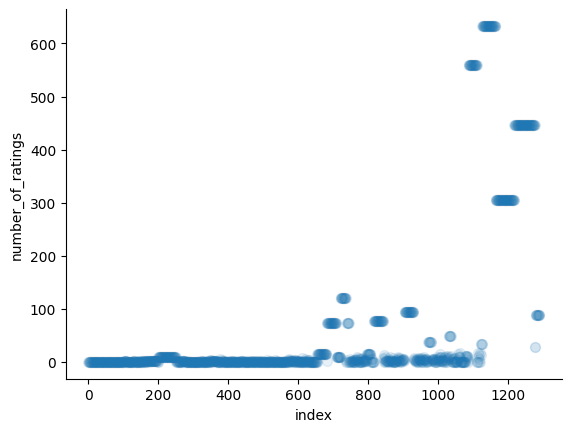

In [ ]:
from matplotlib import pyplot as plt
Merge_Tabelas_qst8_1 = Merge_Tabelas['number_of_ratings'].reset_index()
Merge_Tabelas_qst8_1.plot(kind='scatter', x='index', y='number_of_ratings', s=50, alpha=.10)
plt.gca().spines[['top', 'right',]].set_visible(False)

# 9. Quais são os anúncios que te parecem críticos?

**Os anúncios críticos são os seguintes:**

**Cidades com as menores médias de avaliação.**

In [ ]:
# Analisando a média de avaliações NEGATIVAS gerais por cidade, e pesando pela quantidade de avaliações que cada cidade teve.
Merge_Tabelas = pd.merge(df_ratings, df_details, on='hotel_id')
Merge_Tabelas_nr = Merge_Tabelas[['hotel_name_x', 'hotel_id', 'city_name', 'number_of_ratings', 'Total', 'url']].sort_values(by='number_of_ratings', ascending=True)

# Incluindo a coluna 'hotel_id' no DataFrame final
Cidades_notas_baixas = Merge_Tabelas_nr.groupby('hotel_name_x').agg({'hotel_id': 'first', 'Total': ['count', 'sum', 'mean']}).reset_index()
Cidades_notas_baixas.columns = ['hotel_name_x', 'hotel_id', 'count_of_ratings', 'sum_of_ratings', 'Mean_of_Ratings']
Cidades_notas_baixas = Cidades_notas_baixas.sort_values(by= ['Mean_of_Ratings','count_of_ratings'], ascending = [True, False]).dropna().reset_index()
Cidades_notas_baixas.loc[Cidades_notas_baixas['count_of_ratings'] > 10].head()

,index,hotel_name_x,hotel_id,count_of_ratings,sum_of_ratings,Mean_of_Ratings
54,676,Studios aconchegantes no Setor Marista BLS,10774036,19,142.5,7.5
76,466,Charmosos Flats no Setor Bueno TXP,10769005,51,408.0,8.0
77,677,Studios duplos e individuais 450m da praia RAI,7967879,26,208.0,8.0
102,302,Aptos modernos no centro de Floripa - VLR,8727380,11,91.3,8.3
116,569,Lindo condomínio em meio à natureza em Bombinh...,359731,11,95.7,8.7


**Cidades com as maiores médias de avaliação.**

In [ ]:
# Analisando as maiores médias de avaliações gerais por cidade, e pesando pela quantidade de avaliações que cada cidade teve.
Merge_Tabelas = pd.merge(df_ratings, df_details, on = 'hotel_id')
Merge_Tabelas_nr = Merge_Tabelas[[ 'hotel_name_x','hotel_id','city_name','number_of_ratings','Total','url' ]].sort_values(by='number_of_ratings', ascending = True)
Cidades_notas_baixas = Merge_Tabelas_nr.groupby('hotel_name_x').agg({'hotel_id': 'first', 'Total': ['count', 'sum', 'mean']}).reset_index()
Cidades_notas_baixas.columns = ['hotel_name_x','hotel_id', 'count_of_ratings', 'sum_of_ratings', 'Mean_of_Ratings']
Cidades_notas_baixas.sort_values(by= ['Mean_of_Ratings'], ascending = [False]).dropna().reset_index()
Cidades_notas_baixas.loc[Cidades_notas_baixas['count_of_ratings'] > 10].head()

,hotel_name_x,hotel_id,count_of_ratings,sum_of_ratings,Mean_of_Ratings
4,Acomodações no litoral - PRI,10388188,12,120.0,10.0
302,Aptos modernos no centro de Floripa - VLR,8727380,11,91.3,8.3
423,Chales Naturale - Campos do Jordão - CNA,9529168,15,139.5,9.3
446,Chalés de luxo na Serra Catarinense - VST,8644064,27,253.8,9.4
466,Charmosos Flats no Setor Bueno TXP,10769005,51,408.0,8.0


**Médias dos hoteis incoscistentes.**

In [ ]:
# Analisando as maiores médias de avaliações gerais por cidade, e pesando pela quantidade de avaliações que cada cidade teve.
Merge_Tabelas = pd.merge(df_ratings, df_details, on = 'hotel_id')
Merge_Tabelas_da = Merge_Tabelas[[ 'hotel_name_x','hotel_id','city_name','number_of_ratings','Total','url' ]].sort_values(by='number_of_ratings', ascending = True)
Desvio_avaliacao = Merge_Tabelas_da.groupby('hotel_name_x').agg({'number_of_ratings':('count'), 'Total': [ 'sum', 'mean']}).reset_index()
Desvio_avaliacao.columns = ['hotel_name_x', 'sum_of_ratings', 'weighted_average','Mean_ratings']
Desvio_avaliacao.sort_values(by= ['weighted_average'], ascending = [False])
Desvio_avaliacao.loc[(Desvio_avaliacao['sum_of_ratings'] < 2)].dropna().head()

,hotel_name_x,sum_of_ratings,weighted_average,Mean_ratings
5,Aconchegante apto a 750m da praia BOU201,1,7.7,7.7
7,Aconchegante apto em Capoeiras RMC203,1,9.0,9.0
8,Aconchegante apto próximo praia EIT202,1,7.0,7.0
9,Aconchegante loft com lareira ATO3091,1,9.0,9.0
10,Agradável apto 3 min da praia dos Ingleses VDG114,1,10.0,10.0


# **10. Quais outras análises você faria desses dados? Use sua criatividade.**

 **Qual tipo de comodidade possui maiores médias, sendo assim preferíveis pelos clientes?**

In [ ]:
Merge_Tabelas_Comon = Merge_Tabelas[['accommodation_type', 'city_name', 'hotel_name_x', 'hotel_id', 'number_of_ratings', 'Total', 'url']]
tipos_de_acomodacao = ['holiday_home', 'apartment', 'guest_house','chalet','farm_holiday','hotel','inn','lodge','resort']

filtro = Merge_Tabelas_Comon['accommodation_type'].isin(tipos_de_acomodacao)
resultado_filtrado = Merge_Tabelas_Comon.loc[filtro]
media_total_notas_ap = resultado_filtrado['Total'].mean()
resultado_agrupado = resultado_filtrado.groupby('accommodation_type').agg({'Total': 'mean', 'number_of_ratings': 'sum'}).reset_index()
resultado_agrupado

,accommodation_type,Total,number_of_ratings
0,apartment,8.496154,4786
1,chalet,9.102041,3939
2,farm_holiday,NaN,0
3,guest_house,8.700000,968
4,holiday_home,8.596296,2440
5,hotel,8.375000,239
6,inn,NaN,0
7,lodge,NaN,0
8,resort,9.147368,80740


Qual preferência de tamanho do local de hospedagem? (resolver)

In [ ]:
def categorizar_tamanho(valor):
    if valor < 50:
        return 'Menor que 50'
    elif 50 <= valor <= 100:
        return 'Entre 50 e 100'
    else:
        return 'Maior que 100'

Merge_Tabelas['categoria_tamanho'] = Merge_Tabelas['room_surface_in_m2'].apply(categorizar_tamanho)

tabela_categorias = Merge_Tabelas.groupby('categoria_tamanho').agg({'Total': ['mean'], 'categoria_tamanho': ['count']}).reset_index()
tabela_categorias.columns = ['Categoria','Média','Contagem']

tabela_categorias

,Categoria,Média,Contagem
0,Entre 50 e 100,8.755592,501
1,Maior que 100,8.744048,232
2,Menor que 50,8.664960,558


# 11. Como você projetaria um dashboard para mostrar essas informações?

# 12. Quais outras informações/dados você relacionaria com essas bases, caso tivesse acesso?

Qual bairro localizado o hotel, qual nível econômico do bairro, categoria de hotel urbano ou rural, quantas camas o anúncio oferece, qual agência que está ofertando o anúncio.

# 13. (Extra) Com base nesses dados e nos anúncios fornecidos, como você melhoraria as notas?

O resultado total das notas deveria ser a média ponderada das notas obtidas em 'comodidades', 'localização', 'wi-fi gratuito', 'limpeza', 'custo-benefício'. Dessa maneira buscando filtrar e trazer dados mais fidedignos à experiência do usuário. Foi detectado problemas onde a média total estava 10, no entando as outras notas de consideração não apresentavam média 10 e apenas um usuário havia feito o preenchimento dessa nota. ex:

In [ ]:
merge_erro_notas = Merge_Tabelas.loc[((Merge_Tabelas['number_of_ratings'] == 1) & (Merge_Tabelas['Total'] == 10))].dropna()
merge_erro_notas.loc[(Merge_Tabelas['Comodidades'] != 10) | (Merge_Tabelas['Limpeza'] != 10) | (Merge_Tabelas['Conforto'] != 10) | (Merge_Tabelas['Custo-benefício'] != 10)| (Merge_Tabelas['Localização'] != 10) ]

,Unnamed: 0_x,hotel_id,hotel_name_x,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings,Unnamed: 0_y,room_id,hotel_name_y,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities
129,92,10792136,Metropolitan Sidney - MSS,https://www.booking.com/hotel/br/metropolitan-...,10.0,10.0,10.0,7.5,10.0,10.0,10.0,1,145,1079213602,Metropolitan Sidney - MSS,Goiânia,apartment,Apartamento,70.0,"['Shampoo', 'Geladeira', 'Produtos de limpeza'..."
130,92,10792136,Metropolitan Sidney - MSS,https://www.booking.com/hotel/br/metropolitan-...,10.0,10.0,10.0,7.5,10.0,10.0,10.0,1,146,1079213603,Metropolitan Sidney - MSS,Goiânia,apartment,Apartamento,39.0,"['Papel higiênico', 'Secador de cabelo', 'Cest..."
132,92,10792136,Metropolitan Sidney - MSS,https://www.booking.com/hotel/br/metropolitan-...,10.0,10.0,10.0,7.5,10.0,10.0,10.0,1,148,1079213605,Metropolitan Sidney - MSS,Goiânia,apartment,Apartamento,39.0,"['Roupa de cama', 'Banheiro privativo', 'TV', ..."


# Exportando MERGE_TABELAS_TOTAL

In [ ]:
df_relacao_selecionado.to_excel('df_relacao_selecionado.xlsx')
Merge_Tabelas.to_excel('Merge_Tabelas.xlsx')